# Data reading

In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\naida\Downloads\archive\tweet_emotions.csv')
print(df['sentiment'].unique())

data = df.groupby(['sentiment']).count().content.to_numpy()
data.sort()

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


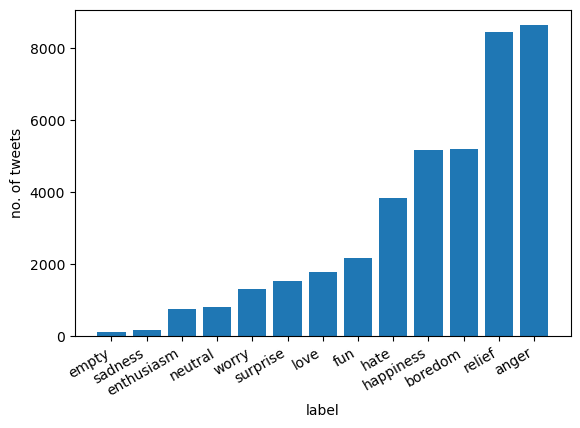

In [2]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
height = data
bars = (df['sentiment'].unique())
x_pos = np.arange(len(bars))

# Create bars
plt.bar(x_pos, height)

# Create names on the x-axis
plt.xticks(x_pos, bars)

plt.gcf().autofmt_xdate()
plt.xlabel('label')
plt.ylabel('no. of tweets')

# Show graph
plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16812 entries, 1 to 39984
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sentiment       16812 non-null  int64 
 1   content         16812 non-null  object
 2   text            16812 non-null  object
 3   sentiment_text  16812 non-null  object
dtypes: int64(1), object(3)
memory usage: 656.7+ KB


In [4]:
df = df.drop(['tweet_id'],axis=1)

In [5]:
df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [6]:
df.isnull().sum()

sentiment    0
content      0
dtype: int64

# Data preprocessing
#### In this section we are going to clean our dataset from charactes that are not important like special charactes, hyperlink, puncations and repreating characters

In [7]:
import re
def cleanTxt(text):
    text = re.sub(r'@\w+|#\w+', '', text) #Removing @mentions
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('/^(?:https?:\/\/)?(?:[^@\n]+@)?(?:www\.)?([^:\/\n?]+)/img', '', text) # Removing hyperlink
    text = re.sub('[^a-zA-Z]', '', text) # remove punctuation
    text = text.lower() 
    text = re.sub(r'([a-z])\1+', r'\1', text) # remove repeating letters
    return text

#!pip install autocorrect
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller

spell = Speller(lang='en')
#nltk.download('all')

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

words = set(nltk.corpus.words.words())
    
def tokenization(text):
    
    #tokenize sentence
    word_tokens = word_tokenize(text)

    #clean words in sentence
    word_tokens1=[]
    for w in word_tokens:
        word_tokens1.append(cleanTxt(w))
    
    #remove stop words
    word_tokens2 = [w for w in word_tokens1 if not w.lower() in stop_words]
    
    #spelling correction 
    #word_tokens3 = [spell(w) for w in word_tokens]
    
    #lemmatization 
    word_tokens4 = [lemmatizer.lemmatize(w, 'v') for w in word_tokens2]
        
    #remove nonenglish words
    word_tokens5 = [w for w in word_tokens4 \
        if w in words or not w.isalpha()]
    
    filtered_sentence = ''

    for w in word_tokens5:
        if w != '':
            filtered_sentence+=' ' + w

    return(filtered_sentence)

df['text'] = df['content'].apply(lambda x : tokenization(x)) 

In [8]:
#!pip install pyspellchecker 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker

spell = SpellChecker()
#nltk.download('all')

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

words = set(nltk.corpus.words.words())
    
def tokenization(text):
    
    #tokenize sentence
    word_tokens = word_tokenize(text)

    #clean words in sentence
    word_tokens1=[]
    for w in word_tokens:
        word_tokens1.append(cleanTxt(w))
    
    #remove stop words
    word_tokens2 = [w for w in word_tokens1 if not w.lower() in stop_words]
    
    #spelling correction 
    word_tokens3 = [spell.correction(w) if not spell.correction(w) is None else w for w in word_tokens2]
    
    #lemmatization 
    word_tokens4 = [lemmatizer.lemmatize(w, 'v') for w in word_tokens3 if not '' ]
        
    #remove nonenglish words
    word_tokens5 = [w for w in word_tokens4 \
         if w in words or not w.isalpha()]
    
    filtered_sentence = ''

    for w in word_tokens5:
        if w != '':
            filtered_sentence+=' ' + w

    return(filtered_sentence)

In [9]:
df['text'] = df['content'].apply(lambda x : tokenization(x)) 

### In this process we are going to see how our data looks like, I was thinking of droping classes that has low data points since it will affect my model

In [10]:
df.head()

,sentiment,content,text
0,empty,@tiffanylue i know i was listenin to bad habi...,i know listen bad habit start part i i
1,sadness,Layin n bed with a headache ughhhh...waitin o...,lay i bed headache ugh i cal i
2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony i glory i
3,enthusiasm,wants to hang out with friends SOON!,want son i
4,neutral,@dannycastillo We want to trade with someone w...,i want trade someone ticket i one i


# Droping datapoints

### replace class text with numbers

In [11]:
df['sentiment_text'] = df['sentiment']
df['sentiment'].replace(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise', 'love', 'fun',
'hate', 'happiness', 'boredom', 'relief', 'anger'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace=True)


In [12]:
y = df['sentiment']
x = df['text']
print(df['sentiment'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


In [13]:
df.head()

,sentiment,content,text,sentiment_text
0,1,@tiffanylue i know i was listenin to bad habi...,i know listen bad habit start part i i,empty
1,2,Layin n bed with a headache ughhhh...waitin o...,lay i bed headache ugh i cal i,sadness
2,2,Funeral ceremony...gloomy friday...,funeral ceremony i glory i,sadness
3,3,wants to hang out with friends SOON!,want son i,enthusiasm
4,4,@dannycastillo We want to trade with someone w...,i want trade someone ticket i one i,neutral


In [14]:
data = df.groupby(['sentiment_text']).size()

print(data.sort_values())

sentiment_text
anger          110
boredom        179
enthusiasm     759
empty          827
hate          1323
relief        1526
fun           1776
surprise      2187
love          3842
sadness       5165
happiness     5209
worry         8459
neutral       8638
dtype: int64


### We see that anger, boredom, enthusiasm and emtpy has low data point that is why we are going to drop those datapoints

In [15]:
anger = df[(df['sentiment_text'] == 'anger') | (df['sentiment_text'] == 'boredom') | (df['sentiment_text'] == 'enthusiasm') | (df['sentiment_text'] == 'empty')].index
df.drop(anger , inplace=True)

In [16]:
data = df.groupby(['sentiment_text']).size()

print(data.sort_values())

sentiment_text
hate         1323
relief       1526
fun          1776
surprise     2187
love         3842
sadness      5165
happiness    5209
worry        8459
neutral      8638
dtype: int64


### We are going to have to dorp some datapoints to make the have same distribution of the classes

In [17]:
anger = df[(df['sentiment_text'] == 'neutral')].index
anger=anger[2000:]
df.drop(anger, inplace=True)
df

,sentiment,content,text,sentiment_text
1,2,Layin n bed with a headache ughhhh...waitin o...,lay i bed headache ugh i cal i,sadness
2,2,Funeral ceremony...gloomy friday...,funeral ceremony i glory i,sadness
4,4,@dannycastillo We want to trade with someone w...,i want trade someone ticket i one i,neutral
5,5,Re-pinging @ghostridah14: why didn't you go to...,ring i i it go i be of it like,worry
6,2,"I should be sleep, but im not! thinking about ...",sleep i i think old friend want i marry i dam...,sadness
...,...,...,...,...
39994,10,Succesfully following Tayla!!,follow i i,happiness
39996,7,Happy Mothers Day All my love,happy mother day al love,love
39997,7,Happy Mother's Day to all the mommies out ther...,happy mother day al i woman man long i someon...,love
39998,10,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,i nitrile wasp beautiful i i i follow i i pep...,happiness


In [18]:
anger = df[(df['sentiment_text'] == 'worry')].index
anger=anger[2000:]
df.drop(anger, inplace=True)
df

,sentiment,content,text,sentiment_text
1,2,Layin n bed with a headache ughhhh...waitin o...,lay i bed headache ugh i cal i,sadness
2,2,Funeral ceremony...gloomy friday...,funeral ceremony i glory i,sadness
4,4,@dannycastillo We want to trade with someone w...,i want trade someone ticket i one i,neutral
5,5,Re-pinging @ghostridah14: why didn't you go to...,ring i i it go i be of it like,worry
6,2,"I should be sleep, but im not! thinking about ...",sleep i i think old friend want i marry i dam...,sadness
...,...,...,...,...
39994,10,Succesfully following Tayla!!,follow i i,happiness
39996,7,Happy Mothers Day All my love,happy mother day al love,love
39997,7,Happy Mother's Day to all the mommies out ther...,happy mother day al i woman man long i someon...,love
39998,10,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,i nitrile wasp beautiful i i i follow i i pep...,happiness


In [19]:
anger = df[(df['sentiment_text'] == 'happiness')].index
anger=anger[2000:]
df.drop(anger, inplace=True)
df

,sentiment,content,text,sentiment_text
1,2,Layin n bed with a headache ughhhh...waitin o...,lay i bed headache ugh i cal i,sadness
2,2,Funeral ceremony...gloomy friday...,funeral ceremony i glory i,sadness
4,4,@dannycastillo We want to trade with someone w...,i want trade someone ticket i one i,neutral
5,5,Re-pinging @ghostridah14: why didn't you go to...,ring i i it go i be of it like,worry
6,2,"I should be sleep, but im not! thinking about ...",sleep i i think old friend want i marry i dam...,sadness
...,...,...,...,...
39984,6,@iscreamshinki Oh that's why.,i oh i,surprise
39989,7,His snoring is so annoying n it keeps me from ...,snore annoy i keep sleep i like right i i hon...,love
39996,7,Happy Mothers Day All my love,happy mother day al love,love
39997,7,Happy Mother's Day to all the mommies out ther...,happy mother day al i woman man long i someon...,love


In [20]:
anger = df[(df['sentiment_text'] == 'sadness')].index
anger=anger[2000:]
df.drop(anger, inplace=True)
df

,sentiment,content,text,sentiment_text
1,2,Layin n bed with a headache ughhhh...waitin o...,lay i bed headache ugh i cal i,sadness
2,2,Funeral ceremony...gloomy friday...,funeral ceremony i glory i,sadness
4,4,@dannycastillo We want to trade with someone w...,i want trade someone ticket i one i,neutral
5,5,Re-pinging @ghostridah14: why didn't you go to...,ring i i it go i be of it like,worry
6,2,"I should be sleep, but im not! thinking about ...",sleep i i think old friend want i marry i dam...,sadness
...,...,...,...,...
39984,6,@iscreamshinki Oh that's why.,i oh i,surprise
39989,7,His snoring is so annoying n it keeps me from ...,snore annoy i keep sleep i like right i i hon...,love
39996,7,Happy Mothers Day All my love,happy mother day al love,love
39997,7,Happy Mother's Day to all the mommies out ther...,happy mother day al i woman man long i someon...,love


In [21]:
anger = df[(df['sentiment_text'] == 'love')].index
anger=anger[2000:]
df.drop(anger, inplace=True)
df

,sentiment,content,text,sentiment_text
1,2,Layin n bed with a headache ughhhh...waitin o...,lay i bed headache ugh i cal i,sadness
2,2,Funeral ceremony...gloomy friday...,funeral ceremony i glory i,sadness
4,4,@dannycastillo We want to trade with someone w...,i want trade someone ticket i one i,neutral
5,5,Re-pinging @ghostridah14: why didn't you go to...,ring i i it go i be of it like,worry
6,2,"I should be sleep, but im not! thinking about ...",sleep i i think old friend want i marry i dam...,sadness
...,...,...,...,...
39959,12,Gooood party last night (: Although I am extre...,god party last night i i although extremely t...,relief
39973,8,good morning/midday nation! FORMULA ONE IN ON...,god nation i formula one one hour i,fun
39977,6,@BuddingGenius you dont say,i dont say,surprise
39979,6,@prinsezha awesome. Wha'dya get her?,i awesome i get i,surprise


In [22]:
print(df['sentiment_text'].unique())

data = df.groupby(['sentiment_text']).count().content.to_numpy()
data.sort()

['sadness' 'neutral' 'worry' 'surprise' 'love' 'fun' 'hate' 'happiness'
 'relief']


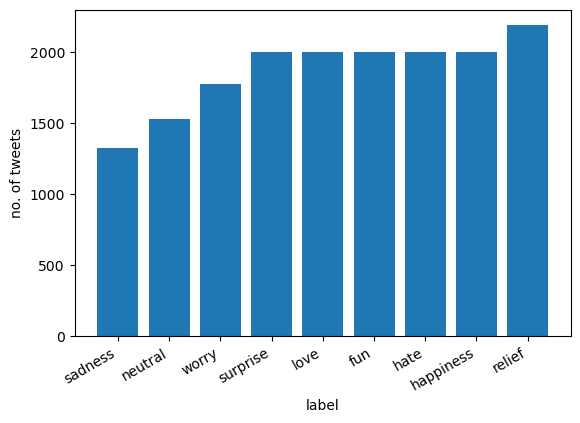

In [23]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
height = data
bars = (df['sentiment_text'].unique())
x_pos = np.arange(len(bars))

# Create bars
plt.bar(x_pos, height)

# Create names on the x-axis
plt.xticks(x_pos, bars)

plt.gcf().autofmt_xdate()
plt.xlabel('label')
plt.ylabel('no. of tweets')

# Show graph
plt.show()

### This looks better 

# Vectorization of the data

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

tf = CountVectorizer(analyzer='word', min_df=1, lowercase=True, stop_words='english')
x_tf = tf.fit_transform(df['text'])

In [25]:
x_tf = x_tf.toarray()

In [26]:
x_tf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
tf.get_feature_names_out()

array(['abalone', 'abandon', 'abhor', ..., 'zone', 'zoo', 'zoologist'],
      dtype=object)

Now we I will join the results into one dataset

In [28]:
final_dataset = pd.DataFrame(x_tf, columns=tf.get_feature_names_out())

In [29]:
final_dataset['sentiment'] = df['sentiment'].to_numpy()

In [30]:
final_dataset

,abalone,abandon,abhor,abide,ability,able,ably,abnormal,aboard,abomination,...,zenith,zero,zeta,zip,zo,zombie,zone,zoo,zoologist,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
16808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
16809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
16810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


final_dataset[:100][:100].to_csv('final_dataset.csv')

In [31]:
print(final_dataset['sentiment'].unique())

[ 2  4  5  6  7  8  9 10 12]


# Splitting data to train and test set

In [32]:
from sklearn.model_selection import train_test_split 

X = final_dataset.loc[:, :'zombie']
print(X.shape)
final_dataset['sentiment']
x_train,x_test,y_train,y_test = train_test_split(X,final_dataset['sentiment'],test_size=0.2,shuffle=True,random_state=42,stratify=final_dataset['sentiment'])

(16812, 6947)


# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=1000, 
                               criterion='gini', 
                               max_depth=None, 
                               min_samples_split=5, 
                               min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0,
                               #max_features=None, 
                               max_leaf_nodes=None, 
                               min_impurity_decrease=0.0, 
                               bootstrap=True, 
                               oob_score=True, 
                               n_jobs=-1, 
                               random_state=None, 
                               verbose=0, 
                               warm_start=True, 
                               class_weight=None, 
                               ccp_alpha=0.0, 
                               max_samples=None)
model.fit(x_train[:],y_train[:])

RandomForestClassifier(min_samples_split=5, n_estimators=1000, n_jobs=-1,
                       oob_score=True, warm_start=True)

In [ ]:
param_grid = {
                 'n_estimators': [5, 10, 15, 20],
                 'max_depth': [2, 5, 7, 9]
             }
#from sklearn.model_selection import GridSearchCV
#grid_clf = GridSearchCV(model, param_grid, cv=10)
#grid_clf.fit(x_train, y_train)

In [35]:
model.score(x_test[:], y_test[:])
#0.24264049955396966 - max_feture=none
#0.24531668153434433 - without max_feture and spelling
#0.26018435920309246 - with spelling 

0.26018435920309246

In [36]:
from sklearn.metrics import multilabel_confusion_matrix
y_pred = model.predict(x_test)
cf_matrix = multilabel_confusion_matrix(y_test[:], y_pred)
print(cf_matrix)

[[[2683  280]
  [ 310   90]]

 [[2482  481]
  [ 271  129]]

 [[2686  277]
  [ 323   77]]

 [[2559  366]
  [ 333  105]]

 [[2667  296]
  [ 243  157]]

 [[2809  199]
  [ 275   80]]

 [[2982  116]
  [ 175   90]]

 [[2669  294]
  [ 305   95]]

 [[2879  179]
  [ 253   52]]]


<AxesSubplot:>

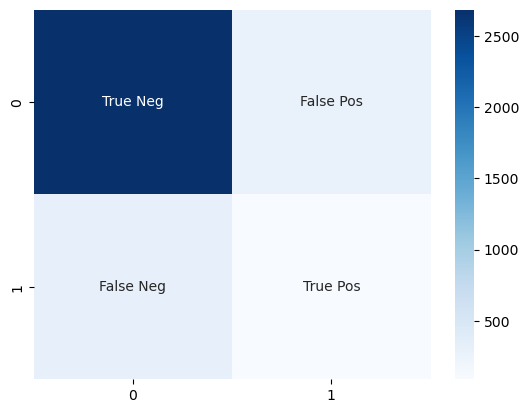

In [37]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix[0], annot=labels, fmt='', cmap='Blues')

<AxesSubplot:>

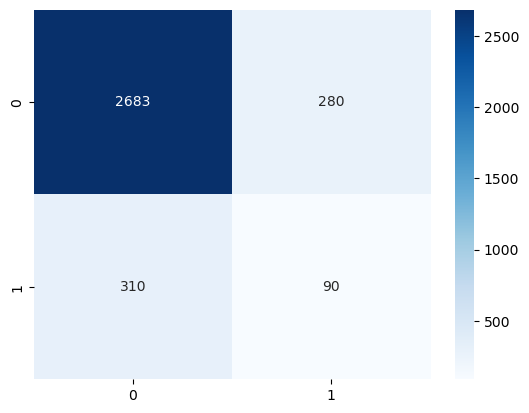

In [38]:
sns.heatmap(cf_matrix[0], annot=True, fmt='', cmap='Blues')